In [5]:
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.autograd import Variable

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision.datasets as dsets
import torchvision

In [7]:
mytransform1 = transforms.Compose(
    [transforms.RandomCrop((101,101)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = dsets.ImageFolder(root='../sample_dataset/train/',transform=mytransform1)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

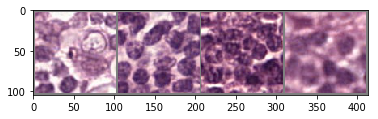

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

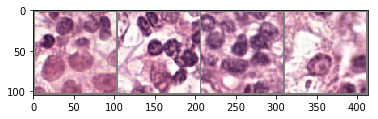

In [12]:
imshow(torchvision.utils.make_grid(images))